# Web Scraping
with *BeautifulSoup*<br><br>
**❗READ the COMMENTS❗** if you're interested in understanding the process that is

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings('ignore')

## Scraping AirlineQuality.com
Scraping from https://www.airlinequality.com/airline-reviews/british-airways<br><br>
**CHANGE THE URL PAGESIZE to scrape more reviews** (pagesize = no of reviews)

In [2]:
import requests
from bs4 import BeautifulSoup

# Select url to scrape
# CHANGE "pagesize" TO SCRAPE MORE REVIEWS, re-run
url = "https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=380"
page = requests.get(url)

# Apply BeautifulSoup
soup = BeautifulSoup(page.content, "html.parser")

# Keep parent block containing the reviews
results = soup.find('article', attrs={'class': 'comp comp_reviews-airline querylist position-content'})

# Keep individual reviews within parent block
reviews = results.find_all("article", itemprop="review")

After we find the parent elements that house each review, we can begin to identify the child elements containing its details.
<br><br>
In this analysis we are interested in the following:<br>
##### Date Published | Name | Rating | Date Flown | Seat Type | Aircraft | Cabin Staff | Seat Comfort | Food & Beverages | Route | Recommended

In [3]:
# Extract all relevant data 

review_data = []

for article in reviews:
    # Name, Rating, Date Published
    name = article.find("span", itemprop="name").text.strip() if article.find("span", itemprop="name") else 'N/A'
    rating = article.find("span", itemprop="ratingValue").text.strip() if article.find("span", itemprop="ratingValue") else 'N/A'
    time = article.find("time", itemprop="datePublished").text.strip() if article.find("time", itemprop="datePublished") else 'N/A'
    # Seat Type
    seat_type_td = article.find('td', class_='review-rating-header', text='Seat Type') 
    seat_type_value = seat_type_td.find_next_sibling('td').text.strip() if seat_type_td else 'N/A'
    # Aircraft
    aircraft_td = article.find('td', class_='review-rating-header', text='Aircraft')
    aircraft_value = aircraft_td.find_next_sibling('td').text.strip() if aircraft_td else 'N/A'
    # Route
    route_td = article.find('td', class_='review-rating-header', text='Route')
    route_value = route_td.find_next_sibling('td').text.strip() if route_td else 'N/A'
    # Date  Flown
    date_flown_td = article.find('td', class_='review-rating-header', text='Date Flown')
    date_flown_value = date_flown_td.find_next_sibling('td').text.strip() if date_flown_td else 'N/A'
    # Recommendation
    rec_td = article.find('td', class_='review-rating-header', text='Recommended')
    rec_value = rec_td.find_next_sibling('td').text.strip() if rec_td else 'N/A'
    # Cabin Staff service rating
    cabin_staff_td = article.find('td', class_='review-rating-header', text='Cabin Staff Service')
    if cabin_staff_td:
        stars = cabin_staff_td.find_next_sibling('td').find_all('span', class_='star fill')
        cabin_staff_rating = stars[-1].text.strip() if stars else 'N/A'
    else:
        cabin_staff_rating = 'N/A'
    # Seat Comfort rating
    seat_comfort_td = article.find('td', class_='review-rating-header', text='Seat Comfort')
    if seat_comfort_td:
        stars = seat_comfort_td.find_next_sibling('td').find_all('span', class_='star fill')
        seat_comfort_rating = stars[-1].text.strip() if stars else 'N/A'
    else:
        seat_comfort_rating = 'N/A'
    # Food & Beverages rating
    f_and_b_td = article.find('td', class_='review-rating-header', text='Food & Beverages')
    if f_and_b_td:
        stars = f_and_b_td.find_next_sibling('td').find_all('span', class_='star fill')
        f_and_b_rating = stars[-1].text.strip() if stars else 'N/A'
    else:
        f_and_b_rating = 'N/A'
        
    # Add values to columns
    review_data.append({
        'Date Published': time,
        'Name': name,
        'Rating': rating,
        'Date Flown': date_flown_value,
        'Seat Type': seat_type_value,
        'Aircraft': aircraft_value,
        'Cabin Staff': cabin_staff_rating,
        'Seat Comfort': seat_comfort_rating,
        'Food & Beverages': f_and_b_rating,
        'Route': route_value,
        'Recommended': rec_value
    })

# Create Data Frame
df = pd.DataFrame(review_data)
df.head(10)

,Date Published,Name,Rating,Date Flown,Seat Type,Aircraft,Cabin Staff,Seat Comfort,Food & Beverages,Route,Recommended
0,9th August 2024,N Kwok,1,August 2024,Economy Class,N/A,N/A,1,N/A,London to Hong Kong,no
1,8th August 2024,Greg Szczurek,2,May 2024,Economy Class,N/A,2,2,2,Dallas to London,no
2,8th August 2024,G Cooper,2,August 2024,Economy Class,Boeing 777,1,1,1,London to Tampa,no
3,7th August 2024,G Jones,8,July 2024,Economy Class,Embraer 190,4,4,3,Dublin to London City,yes
4,7th August 2024,Janeks Volkovs,10,August 2024,Business Class,A320,5,4,5,Riga to London,yes
5,5th August 2024,Mary Siniscalchi,1,August 2024,Economy Class,N/A,3,3,N/A,Rome to Philadelphia via London,no
6,3rd August 2024,R Foster,1,August 2024,Economy Class,N/A,1,3,1,London to Bologna,no
7,2nd August 2024,Kevin Butler,1,August 2024,Business Class,A380,3,1,3,Sydney to London,no
8,2nd August 2024,S Irving,10,August 2024,Business Class,A320,5,3,4,Dublin to London Heathrow,yes
9,30th July 2024,S Drew,1,July 2024,Economy Class,N/A,1,1,N/A,London to Los Angeles via Paris CDG,no


**⬇ Use the following block to save new data. ⬇** after uncommenting the second line obviously

In [2]:
# Save Data Frame to csv
#df.to_csv('BA_Skytrax_2022-2024(11-August).csv', index=False, encoding='utf-8')

---
## ➤ RATINGS FOR EACH CLASS 

In [7]:
# Isolate Seat Types
business = df[df['Seat Type'] == 'Business Class']
premium = df[df['Seat Type'] == 'Premium Economy']
economy = df[df['Seat Type'] == 'Economy Class']

In [8]:
# BUSINESS
# Count rating occurrences for business class
bus_counts = business['Rating'].value_counts()
bus_counts = pd.DataFrame(bus_counts)
# Add column names
bus_counts = bus_counts.reset_index()
bus_counts.columns = ['Rating', 'Count']
# Convert 'Rating' column to numeric type
bus_counts['Rating'] = pd.to_numeric(bus_counts['Rating'])
bus_counts = bus_counts.sort_values(by=['Rating'], ascending=False)

# PREMIUM
# Count rating occurrences for business class
prem_counts = premium['Rating'].value_counts()
prem_counts = pd.DataFrame(prem_counts)
# Add column names
prem_counts = prem_counts.reset_index()
prem_counts.columns = ['Rating', 'Count']
# Convert 'Rating' column to numeric type
prem_counts['Rating'] = pd.to_numeric(prem_counts['Rating'])
prem_counts = prem_counts.sort_values(by=['Rating'], ascending=False)

# ECONOMY
# Count rating occurrences for business class
eco_counts = economy['Rating'].value_counts()
eco_counts = pd.DataFrame(eco_counts)
# Add column names
eco_counts = eco_counts.reset_index()
eco_counts.columns = ['Rating', 'Count']
# Convert 'Rating' column to numeric type
eco_counts['Rating'] = pd.to_numeric(eco_counts['Rating'])
eco_counts = eco_counts.sort_values(by=['Rating'], ascending=False)

**🤔 If you have no idea what is going on, scroll down to the final graph and you'll get the idea. 🫡**

In [13]:
# Define function to categorize ratings
def categorize_rating(rating):
    if 1 <= rating <= 3:
        return 'Unhappy (1-3)'
    elif 4 <= rating <= 6:
        return 'Neutral (4-6)'
    elif 7 <= rating <= 10:
        return 'Happy (7-10)'
    else:
        return 'Other'

# Apply the function to categorize ratings
bus_counts['Category'] = bus_counts['Rating'].apply(categorize_rating) # Business
prem_counts['Category'] = prem_counts['Rating'].apply(categorize_rating) # Premium
eco_counts['Category'] = eco_counts['Rating'].apply(categorize_rating) # Economy

# Group by the new category and sum the counts
grouped_counts_bus = bus_counts.groupby('Category')['Count'].sum().reset_index() # Business
grouped_counts_prem = prem_counts.groupby('Category')['Count'].sum().reset_index() # Premium
grouped_counts_eco = eco_counts.groupby('Category')['Count'].sum().reset_index() # Economy

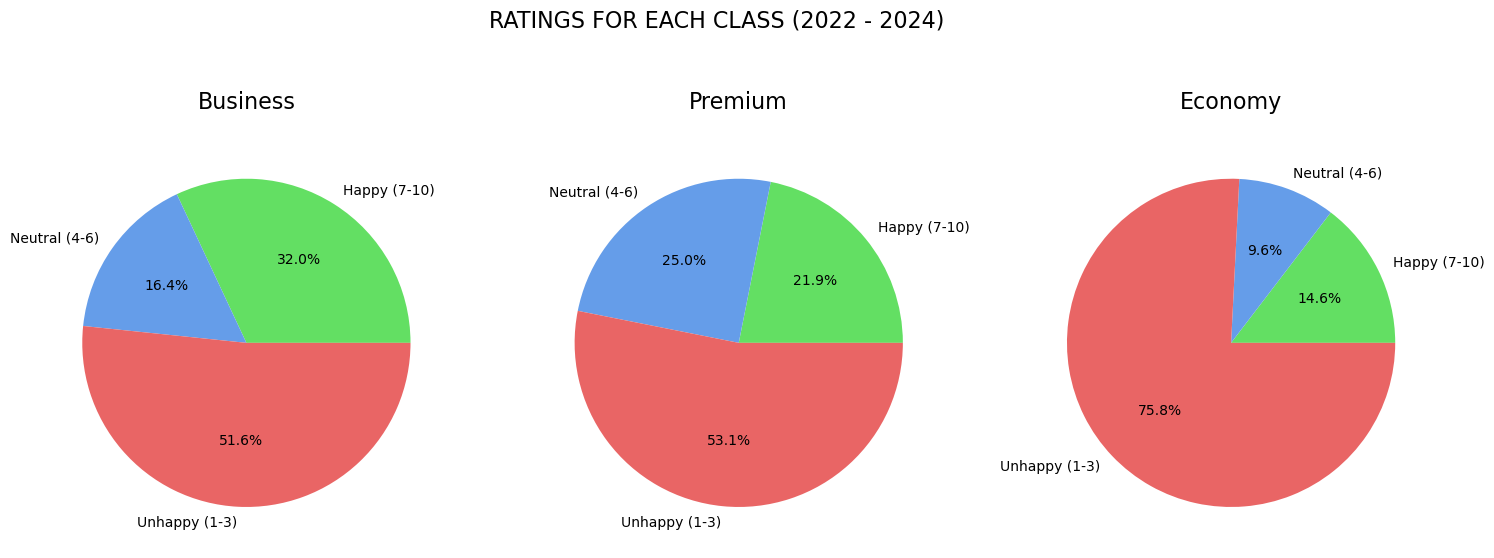

In [11]:
# Define softer colors for each category
colors = {'Happy (7-10)': '#63DF63',    # greenish
          'Neutral (4-6)': '#659DE9',   # reddish
          'Unhappy (1-3)': '#E96565'}   # bluish

# Creating the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Business pie chart
bus_colors = [colors.get(category, '#cccccc') for category in grouped_counts_bus['Category']]
axes[0].pie(grouped_counts_bus['Count'], labels=grouped_counts_bus['Category'], colors=bus_colors, autopct='%1.1f%%')
axes[0].set_title('Business', fontsize=16, y=1.05)

# Premium pie chart
prem_colors = [colors.get(category, '#cccccc') for category in grouped_counts_prem['Category']]
axes[1].pie(grouped_counts_prem['Count'], labels=grouped_counts_prem['Category'], colors=prem_colors, autopct='%1.1f%%')
axes[1].set_title('Premium', fontsize=16, y=1.05)

# Economy pie chart
eco_colors = [colors.get(category, '#cccccc') for category in grouped_counts_eco['Category']]
axes[2].pie(grouped_counts_eco['Count'], labels=grouped_counts_eco['Category'], colors=eco_colors, autopct='%1.1f%%')
axes[2].set_title('Economy', fontsize=16, y=1.05)

# Chart title
fig.suptitle('RATINGS FOR EACH CLASS (2022 - 2024)', fontsize=16, y=1.05)

plt.show()

**WOW who would have thought British Airways would have such terrible reviews!!** <br>(anyone who has flown with them obviously)